#**Assignment 4 Part 2**

**Expected Time:** 2 hours

#**Classification and Evaluation**

In Part 1 of this assignment, we looked at Linear Regression and built a model from scratch. In practice, we usually do not build models from scratch, but use already available ones. Scikit-Learn provides a vast variety of models. You can have a look at the different options available here (completely optional): <br>
* Classification: https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html <br> 
* Overall Supervised Learning: https://scikit-learn.org/stable/supervised_learning.html <br>

In this Part, we will return to our dataset of Assignment 2 (Mental Health in Tech Companies) and check if we could use features related to work environment of an individual to predict whether they suffer from mental health issues or not. 

###**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot


###**Importing Cleaned Dataset**

Analyze the data properly so you can make an informed decision during feature selection.

In [ ]:
# For display purposes
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)


data_tech = pd.read_pickle('data_tech.pkl')
columns = pd.read_csv('Cols_cleaned.csv')
columns

In [ ]:
data_tech.sample(10)

###**Feature Engineering**

We want to make use of our features to predict whether an employee in the tech-industry would have mental health issues or not. 
But before that, we need to transform our features into new numerical features that the model could interpret. This process of transforming raw data into encoded features is known as Feature Engineering

**Q1:** Choose your own attributes that you would like to have in your feature set. Encode them into numerical values. This can be a repetitive step, therefore, feel free to come back to this question and add/remove features. (/3)

In [ ]:
# Enter Code here

In [ ]:
data_tech.info()

**Q2:** Create a correlation matrix to see how do your selected features correlate with each other and the test attribute. (/3)

In [ ]:
# Enter Code here

**Q2:** Next, we want to create our feature set and our label vector. Extract your chosen attributes from the dataframe and create a feature set. Similarly, create a label vector. Decide which column will be appropriate to act as a label vector. Give reasoning for your choice of both the feature set and test vector at the end of the cell as comments. (/3 + 2) 

In [ ]:
# Enter Code here
Feature_set = ...
Label = ...

# Reasoning about Feature set:

# Reasoning about test label:

In [ ]:
print("The Feature Set of our Model:\n\n",Feature_set)

In [ ]:
print("Labels:",Label)

###**Creating a KNN Classifier**

This is a classification problem. Therefore, we can apply a **K-Nearest Neighbor Model** to it.

K-nearest neighbors (KNN) algorithm is a type of supervised ML algorithm which can be used for both classification as well as regression predictive problems. However, it is mainly used for classification predictive problems in industry. K-nearest neighbors (KNN) algorithm uses ‘feature similarity’ to predict the values of new datapoints which further means that the new data point will be assigned a value based on how closely it matches the points in the training set.
You can read more on KNNs from this documentation. It will also help you build the model ahead:
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Here is a completely optional interactive video on understanding how KNNs works: <br> https://youtu.be/MDniRwXizWo

###**Importing Scikit Learn Libraries**

In [ ]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split # For splitting dataset
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, multilabel_confusion_matrix # Evaluation metrics
from sklearn.neighbors import KNeighborsClassifier # KNN Classifier

###**Splitting Data**

**Q3:** To set up a model, you first have to split your data into train and test sets. We can do this manually, but that will not be an optimized approach and can include biases. Therefore, we have an in-built function for it: train_test_split <br> 
Read this documentation to see how to use it. **Hint:** It is a one-liner!  (/3)<br> https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
# Split dataset into training set and test set. Choose the test_size parameter yourself. 

# Printing shapes
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

**Q4:** Now let's create the KNN classifier. Follow the guidelines below to create, fit, and make predictions using your initial classifier. Refer to the KNN documentation for help. (/6)

In [ ]:
# Create KNN Classifier. Keep any value of K for now e.g. 3,5,7...

# Train the model using the training sets

# Predict the response for test dataset


We can now calculate the initial accuracy of our model. Remember that we have not optimized any parameters yet.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy in Percentage:",np.around(((metrics.accuracy_score(y_test, y_pred))*100),decimals=5),"%")

###**Optimization**

One of the main parameters for KNN is the number of neighbors. We want to find out for which value of K will the loss be minimized. To do that, we create models for varying values of K, and plot a graph of Error Rate against Number of Neighbors.

In [ ]:
error_rate = []

for i in range(1,20): 
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 y_pred = knn.predict(X_test)
 error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(8,5))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors-K')
plt.ylabel('Error Rate')
plt.show()

min_val = 1+error_rate.index(min(error_rate))
print("Minimum error: ",np.around(min(error_rate),decimals=5),"at K =", min_val)

**Q5:** Now that you know the optimum value for K, create another model using this value. Also predict using X_train (as well as X_test) and store their results in separate variables. We will use that in the next question. (/4) <br>
**Note:** Do not hard code the value of K. 

In [ ]:
# Create KNN Classifier

# Train the model using the training sets

# Predict the response for Test data

# Predict the response for Train data


###**Evaluation Metrics**

**Q6:** The final part of the modelling process is evaluation of the model. There are four metrics which are commonly used. Each holds its own significance and meaning: 

*   Accuracy
*   F1 Score
*   Precision
*   Recall

Define Accuracy, Precision, and Recall in terms of this model. (/3)

**Answer here:** <br>
Accuracy: <br>
Precision: <br>
Recall: <br>

**Q7:** Scikit Learn has in-built functions for calculating each metric individually. Look up for these functions and print the following: 
(/5)

*   Train Accuracy
*   Test Accuracy
*   F1 Score
*   Precision
*   Recall

In [ ]:
# Enter Code here

**Q8:** As a final exercise, we want to summarize our prediction results using a confusion matrix. Create and display a confusion matrix that shows the test predictions. Again, you can use sklearn for the purpose. (/5) <br>
**Note:** Do not forget to label the plot properly.  

In [ ]:
from sklearn.metrics import confusion_matrix
# Enter Code here

**Q9:** Do the above results validate the accuracy, recall, and precision scores that you received in **Q7**? <br>Manually calculate the accuracy, precision, and recall of the test predicitions. Do not forget to state the formula you used for each. (/3)

Answer here

###**Conclusion**

This brings an end to your assignment on creating Machine Learning Models. In this part, we saw how implementations are already available in libraries such as Scikit Learn, which streamlines the entire process of machine learning. Various parameters can also be tuned in order to increase performances. <br>
We hope that you enjoyed this assignment (especially Part 2), and have gained some experience of building models and classifiers. <br>

We will conclude with a small joke on Machine Learning. <br>
Till next time. Take care!

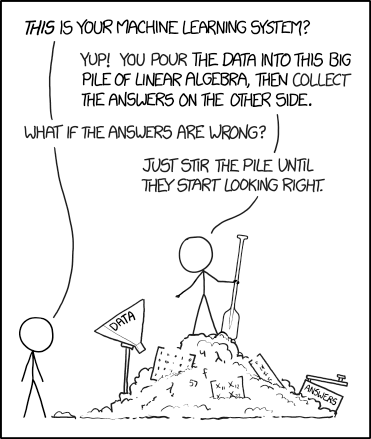